In [1]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Load Dataset

In [2]:
df = pd.read_csv('../data/NumericalLoanData.csv', low_memory=False)
df

,Default,Age,AppliedAmount,DebtToIncome,FreeCash,IncomeTotal,LiabilitiesTotal,LoanDuration,NewCreditCustomer,NrOfDependants,WOECountry,WOEEducation,WOEEmploymentDurationCurrentEmployer,WOEEmploymentStatus,WOEGender,WOEHomeOwnershipType,WOEMaritalStatus,WOEOccupationArea,WOEUseOfLoan,WOEWorkExperience
0,1,53,2125.0000,26.2900,10.9200,354.0000,485.0900,60,0,0.0000,-0.4964,-0.2142,-0.0269,0.4649,-0.0306,-0.2004,-0.1084,0.1105,-0.0249,0.0350
1,1,50,3000.0000,30.5800,78.8000,900.0000,736.4500,60,0,0.0000,-0.4964,-0.2081,-0.0269,-0.0732,-0.0306,-0.2004,-0.1084,0.0489,-0.0249,0.0350
2,1,44,10630.0000,26.7100,349.4300,1200.0000,905.0000,60,1,1.0000,-0.4964,-0.2142,0.0146,-0.0732,0.0242,0.1064,0.1355,-0.0772,-0.0249,0.0350
3,1,42,1500.0000,7.3600,449.4700,863.0000,350.0000,60,1,0.0000,0.9821,0.3224,0.0256,-0.0171,0.0242,0.2052,-0.1084,0.1105,-0.0249,-0.0213
4,1,34,1595.0000,36.0400,95.8100,697.0000,940.0000,48,1,2.0000,0.9821,-0.2142,0.0146,0.4649,-0.0306,0.1064,0.1355,0.1105,0.0271,-0.0213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34740,1,38,2000.0000,9.4000,1393.8900,2300.0000,830.0000,60,1,0.0000,0.7346,0.5210,0.0256,-0.0171,-0.0306,0.1064,-0.1084,0.1105,0.0271,-0.0213
34741,0,37,7440.0000,69.7700,5.5100,2172.0000,2488.0900,60,0,0.0000,0.7346,-0.2142,-0.0269,-0.0171,0.0242,0.1064,0.1355,-0.0772,-0.0249,0.0350
34742,0,37,1595.0000,30.1300,67.9200,1550.0000,1877.0000,60,0,0.0000,0.9821,0.5210,-0.0269,-0.0171,0.0242,0.1064,0.1355,-0.0772,0.0271,0.0350
34743,0,58,3000.0000,25.3500,11.2900,350.0000,359.0000,60,1,0.0000,-0.4964,0.5210,0.0146,-0.0171,-0.0306,-0.2004,-0.1084,0.1105,0.0271,0.0350


# Split Dataset

In [3]:
train, test = train_test_split(df, test_size=0.2)

In [4]:
train_y = train.pop('Default')
test_y = test.pop('Default')

# Linear Discriminant Analysis

In [25]:
lda = LinearDiscriminantAnalysis()

In [26]:
lda.fit(train, train_y)

LinearDiscriminantAnalysis()

In [27]:
test_y_predicted = lda.predict(test)

In [28]:
print("Accuracy:", accuracy_score(test_y, test_y_predicted))
print("Classification Report:\n", classification_report(test_y, test_y_predicted))
print("ROC AUC Score:", roc_auc_score(test_y, lda.predict_proba(test)[:, 1]))

Accuracy: 0.6805295726003742
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.59      0.62      2993
           1       0.71      0.75      0.73      3956

    accuracy                           0.68      6949
   macro avg       0.67      0.67      0.67      6949
weighted avg       0.68      0.68      0.68      6949

ROC AUC Score: 0.7330918249761746


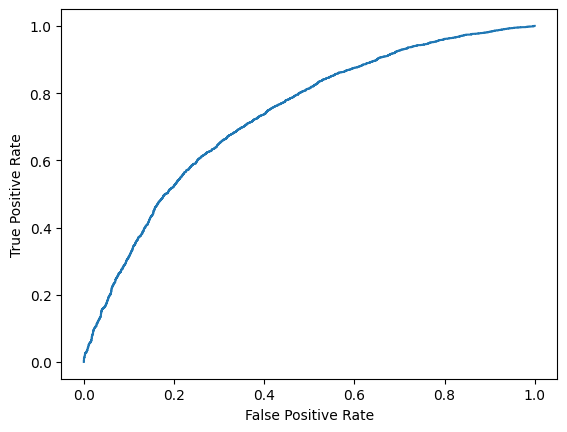

In [29]:
test_y_proba = lda.predict_proba(test)[::,1]
fpr, tpr, _ = roc_curve(test_y,  test_y_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Predictor Coefficients

In [30]:
columns = test.columns
coefficients = pd.DataFrame(copy.deepcopy(lda.coef_))
coefficients.columns = columns
coefficients

,Age,AppliedAmount,DebtToIncome,FreeCash,IncomeTotal,LiabilitiesTotal,LoanDuration,NewCreditCustomer,NrOfDependants,WOECountry,WOEEducation,WOEEmploymentDurationCurrentEmployer,WOEEmploymentStatus,WOEGender,WOEHomeOwnershipType,WOEMaritalStatus,WOEOccupationArea,WOEUseOfLoan,WOEWorkExperience
0,-0.0035,0.0000,0.0070,0.0000,0.0000,-0.0001,0.0239,0.1908,0.0309,0.9403,0.6291,2.9089,-0.0770,0.2209,-0.0782,0.1780,0.6125,0.3740,-0.2078


# Cross-validation Accuracy

In [88]:
lda = LinearDiscriminantAnalysis()
X = copy.deepcopy(df)
y = X.pop('Default')
score = cross_val_score(lda, X, y, cv=10)
roc_auc = cross_val_score(lda, X, y, scoring='roc_auc', cv=10)

print(f'Accuracy: {score.mean()} +- {score.std()}')
print(f'ROC AUC: {roc_auc.mean()} +- {roc_auc.std()}')

Accuracy: 0.664234813185721 +- 0.07484093077160925
ROC AUC: 0.7330545849801873 +- 0.08341107086021167


# Ignore - Testing Only

In [77]:
lda = LinearDiscriminantAnalysis(store_covariance=True, n_components=1)
lda.fit(train, train_y)

LinearDiscriminantAnalysis(n_components=1, store_covariance=True)

In [84]:
X = copy.deepcopy(df)
y = X.pop('Default')
X_ = lda.transform(X)

(-25.0, 5.0)

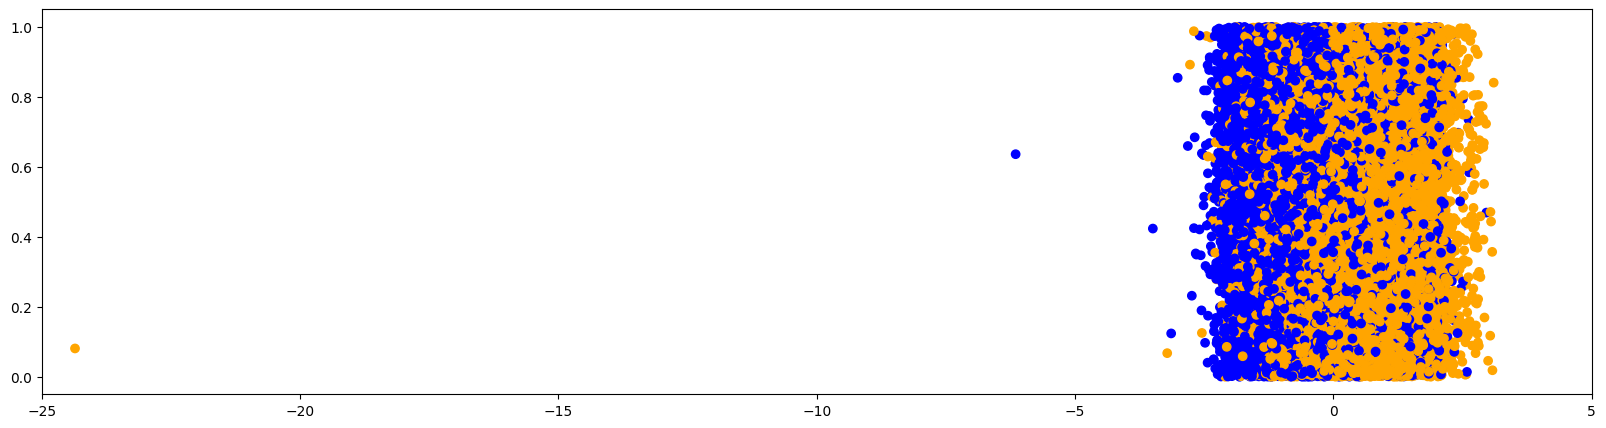

In [85]:
colors = ['blue', 'orange']
cs = [colors[g] for g in y]

plt.figure(figsize=(20, 5))
plt.scatter(X_, np.random.rand(*X_.shape), c=cs)
plt.xlim(-25, 5)

(-25.0, 5.0)

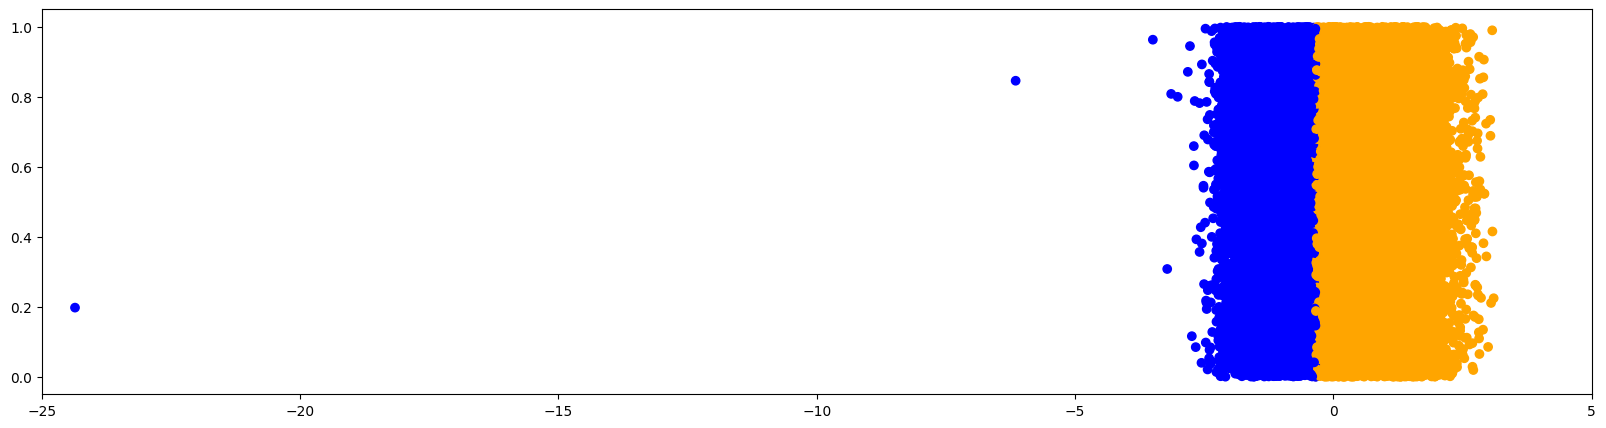

In [86]:
y_pred = lda.predict(X)
colors = ['blue', 'orange']
cs = [colors[g] for g in y_pred]

plt.figure(figsize=(20, 5))
plt.scatter(X_, np.random.rand(*X_.shape), c=cs)
plt.xlim(-25, 5)

In [80]:
means = lda.transform(lda.means_)
means

C:\Users\pikma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([[-0.4751],
       [ 0.3719]])